In [1]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

nframes = []
traj_all = []
date_all = []
glip_feats_all = []
target_filenames = []
phase = 'test'
max_frames = 50

date_dir = "your_path/hand_data_for_pipeline_mask_redcup"
glip_feats_dir = "your_path/glip_feats_redcup"
train_filenames = "your_path/train_split.txt"
test_filenames = "your_path/test_split.txt"

In [2]:
def read_train_test_split(phase, train_filenames, test_filenames):
    if phase == 'train':
        with open(train_filenames, "r") as train_file:
            split_filenames = [line.strip() for line in train_file]
    else:
        with open(test_filenames, "r") as test_file:
            split_filenames = [line.strip() for line in test_file]
    return split_filenames

In [3]:
split_filenames = read_train_test_split(phase, train_filenames, test_filenames)
date_path_all = sorted([p for p in os.listdir(date_dir)])

In [4]:
# read traj files and vision features
for date_path in date_path_all:
    if not (date_path in split_filenames):
        continue
    target_filenames.append(date_path)
    traj_path = os.path.join(date_dir, date_path, "traj3d_in_cam", "traj3d_in_cam_array.npy")
    traj_data_raw = np.load(traj_path)
    # transpose
    traj_data = np.zeros_like(traj_data_raw)
    traj_data[:, 0] = traj_data_raw[:, 1]
    traj_data[:, 1] = traj_data_raw[:, 0]
    traj_data[: ,2] = traj_data_raw[: ,2]/1000.0 # mm -> m

    traj_all.append(traj_data)
    nframes.append(min(traj_data.shape[0], max_frames))

    glip_feats_path = os.path.join(glip_feats_dir, date_path + ".npy")
    glip_feats = np.load(glip_feats_path)
    glip_feats_all.append(glip_feats)

In [5]:
for idx in range(len(target_filenames)):
    assert traj_all[idx].shape[0]==glip_feats_all[idx].shape[0]
    if target_filenames[idx] in split_filenames:
        print(phase+ " date:", target_filenames[idx])

test date: 2025-0102-20-32-40
test date: 2025-0102-20-33-21
test date: 2025-0102-20-34-30
test date: 2025-0102-20-35-35
test date: 2025-0102-20-36-55
test date: 2025-0102-20-38-57
test date: 2025-0102-20-39-44
test date: 2025-0102-20-40-42
test date: 2025-0102-20-42-21
test date: 2025-0102-20-43-37
test date: 2025-0102-20-43-47
test date: 2025-0102-20-46-50
test date: 2025-0102-20-50-08
test date: 2025-0102-20-50-27
test date: 2025-0102-20-51-01
test date: 2025-0102-20-55-34
test date: 2025-0102-20-58-13
test date: 2025-0102-20-59-21
test date: 2025-0102-21-01-40
test date: 2025-0102-21-03-01
test date: 2025-0102-21-06-20
test date: 2025-0103-09-32-21
test date: 2025-0103-09-34-44
test date: 2025-0103-09-38-53
test date: 2025-0103-09-39-16
test date: 2025-0103-09-41-43
test date: 2025-0103-09-42-46
test date: 2025-0103-09-43-07
test date: 2025-0103-09-43-17
test date: 2025-0103-09-43-39
test date: 2025-0103-09-44-00
test date: 2025-0103-09-45-14
test date: 2025-0103-09-45-25
test date:

masked_rgb_show_dir: /Volumes/PortableSSD/hand_data_for_pipeline_mask_redapple/2025-0102-20-32-40/masked_rgb
glip_feats_show_filename: /Volumes/PortableSSD/glip_feats_redapple/2025-0102-20-32-40.npy
['000144.jpg', '000176.jpg', '000116.jpg']


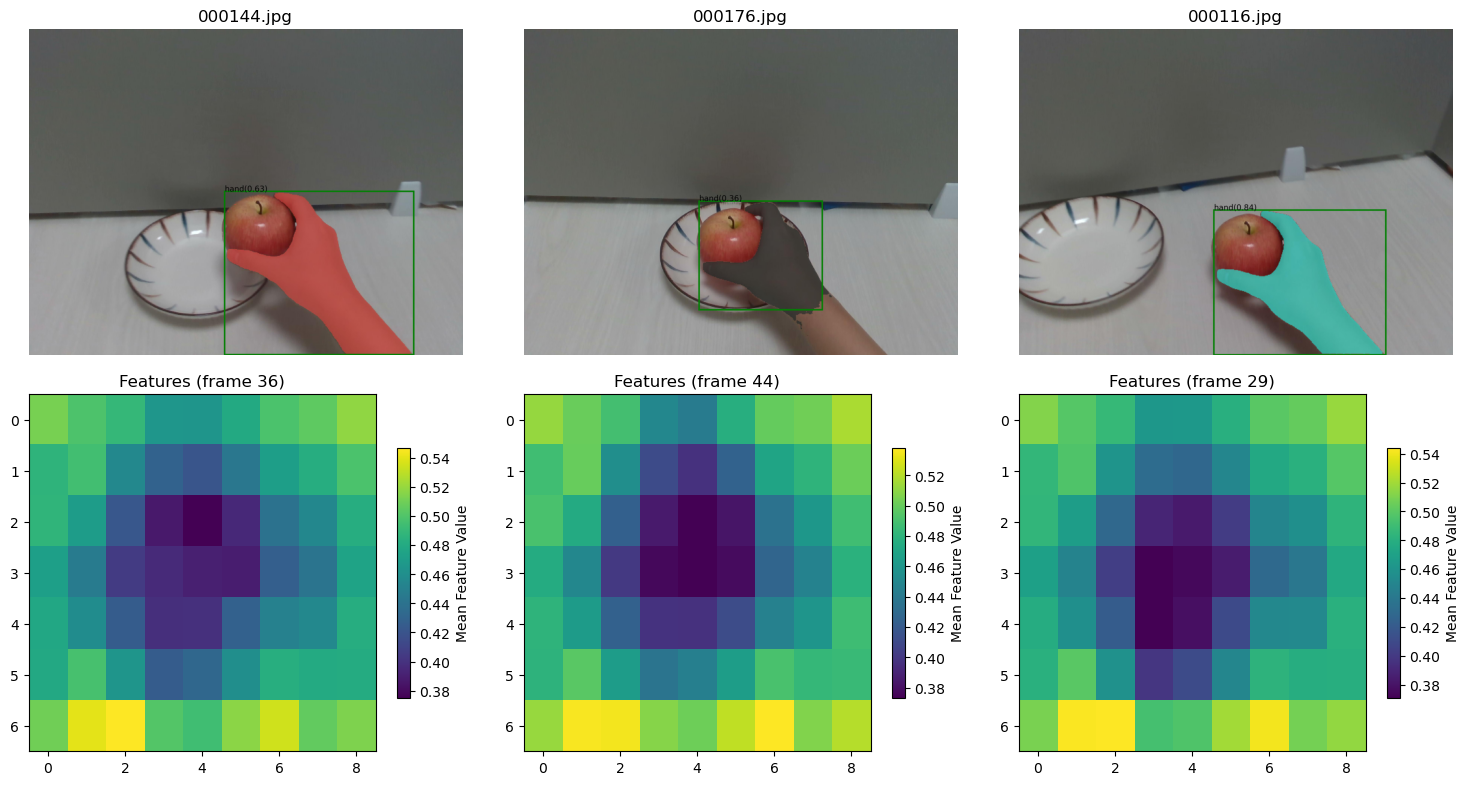

In [17]:
masked_rgb_show_dir = os.path.join(date_dir, target_filenames[0], "masked_rgb")
glip_feats_show_filename = os.path.join(glip_feats_dir, target_filenames[0] + ".npy")
print("masked_rgb_show_dir:", masked_rgb_show_dir)
print("glip_feats_show_filename:", glip_feats_show_filename)

image_filenames = [f for f in os.listdir(masked_rgb_show_dir) if f.endswith('.jpg')]
image_filenames = sorted(image_filenames)
selected_image_filenames = random.sample(image_filenames, 3)
print(selected_image_filenames)

glip_feats_show = np.load(glip_feats_show_filename)

plt.figure(figsize=(15, 8))
for i, filename in enumerate(selected_image_filenames, 1):
    img_path = os.path.join(masked_rgb_show_dir, filename)
    img = mpimg.imread(img_path)
    
        
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')
    
    frame_idx = int(filename.split(".")[0]) // 4
    glip_feats_show_ = glip_feats_show[frame_idx]  
    
    plt.subplot(2, 3, i + 3)
    if len(glip_feats_show_.shape) == 2:
        plt.imshow(glip_feats_show_, cmap='viridis', aspect='auto')
        plt.colorbar(label='Feature Value', shrink=0.7)
    elif len(glip_feats_show_.shape) == 3:
        feats_to_show = np.mean(glip_feats_show_, axis=0)
        plt.imshow(feats_to_show, cmap='viridis', aspect='auto')
        plt.colorbar(label='Mean Feature Value', shrink=0.7)
    plt.title(f"Features (frame {frame_idx})")
    plt.axis('on') 
    
plt.tight_layout()